In [ ]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
Iris_df= pd.read_csv("iris (1).csv")
Iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Check if there are any missing values

In [2]:
Missing_Values= Iris_df.isnull().sum()
Missing_Values

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [3]:
Iris_features_df=Iris_df.drop(labels= 'Species', axis=1)

In [4]:
Iris_features_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


In [5]:
Iris_features_df=Iris_features_df.apply(lambda Iris_features_df:Iris_features_df.fillna(Iris_features_df.median()))
Iris_features_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.40,0.2
1,2,4.9,3.0,1.40,0.2
2,3,4.7,3.2,1.30,0.2
3,4,4.6,3.1,1.50,0.2
4,5,5.0,3.6,1.40,0.2
5,6,5.4,3.9,1.70,0.4
6,7,4.6,3.4,1.40,0.3
7,8,5.0,3.4,1.50,0.2
8,9,4.4,2.9,1.40,0.2
9,10,4.9,3.1,1.50,0.1


# Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
Iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
Iris_df['Species']= Iris_df.Species.astype('category')
Iris_df.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [8]:
Iris_features_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [9]:
Iris_DF1= Iris_df.drop('Id', axis=1)
Iris_DF1.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
Iris_DF1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.3,1.30,1.8,2.5


In [11]:
Iris_DF1.groupby(('Species')).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,51,50,50,51


In [12]:
Iris_DF1.groupby(('Species')).corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                                     
Iris-setosa     SepalLengthCm       1.000000      0.746780       0.263874   
                SepalWidthCm        0.746780      1.000000       0.176695   
                PetalLengthCm       0.263874      0.176695       1.000000   
                PetalWidthCm        0.279092      0.279973       0.306308   
Iris-versicolor SepalLengthCm       1.000000      0.525911       0.754049   
                SepalWidthCm        0.525911      1.000000       0.560522   
                PetalLengthCm       0.754049      0.560522       1.000000   
                PetalWidthCm        0.546461      0.663999       0.786668   
Iris-virginica  SepalLengthCm       1.000000      0.457228       0.864225   
                SepalWidthCm        0.457228      1.000000       0.401045   
                PetalLengthCm       0.864225      0.401045       1.000000   
                PetalWidthCm        0.281108      0.537728       0.322108   

                               PetalWidthCm  
Species                                      
Iris-setosa     SepalLengthCm      0.279092  
                SepalWidthCm       0.279973  
                PetalLengthCm      0.306308  
                PetalWidthCm       1.000000  
Iris-versicolor SepalLengthCm      0.546461  
                SepalWidthCm       0.663999  
                PetalLengthCm      0.786668  
                PetalWidthCm       1.000000  
Iris-virginica  SepalLengthCm      0.281108  
                SepalWidthCm       0.537728  
                PetalLengthCm      0.322108  
                PetalWidthCm       1.000000

In [13]:
Iris_DF1.groupby(('Species')).count().corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.0,NaN,NaN,1.0
SepalWidthCm,NaN,NaN,NaN,NaN
PetalLengthCm,NaN,NaN,NaN,NaN
PetalWidthCm,1.0,NaN,NaN,1.0


In [14]:
Iris_DF1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [60]:
Iris_DF1=Iris_DF1.drop(labels= 'SepalWidthCm', axis=1)

In [62]:
Iris_DF1

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,1.4,0.2,Iris-setosa
1,4.9,1.4,0.2,Iris-setosa
2,4.7,1.3,0.2,Iris-setosa
3,4.6,1.5,0.2,Iris-setosa
4,5.0,1.4,0.2,Iris-setosa
5,5.4,1.7,0.4,Iris-setosa
6,4.6,1.4,0.3,Iris-setosa
7,5.0,1.5,0.2,Iris-setosa
8,4.4,1.4,0.2,Iris-setosa
9,4.9,1.5,0.1,Iris-setosa


In [69]:
Iris_DF1=Iris_DF1.drop(labels= 'PetalLengthCm', axis=1)

In [70]:
Iris_DF1

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa
5,5.4,0.4,Iris-setosa
6,4.6,0.3,Iris-setosa
7,5.0,0.2,Iris-setosa
8,4.4,0.2,Iris-setosa
9,4.9,0.1,Iris-setosa


In [71]:
Iris_DF1.groupby(('Species')).count().corr()

,SepalLengthCm,PetalWidthCm
SepalLengthCm,1.0,1.0
PetalWidthCm,1.0,1.0


In [72]:
Iris_DF1.groupby(('Species')).corr()

SepalLengthCm  PetalWidthCm
Species                                                   
Iris-setosa     SepalLengthCm       1.000000      0.279092
                PetalWidthCm        0.279092      1.000000
Iris-versicolor SepalLengthCm       1.000000      0.546461
                PetalWidthCm        0.546461      1.000000
Iris-virginica  SepalLengthCm       1.000000      0.281108
                PetalWidthCm        0.281108      1.000000

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [73]:
Iris_DF1.var()

SepalLengthCm    0.681143
PetalWidthCm     0.580926
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

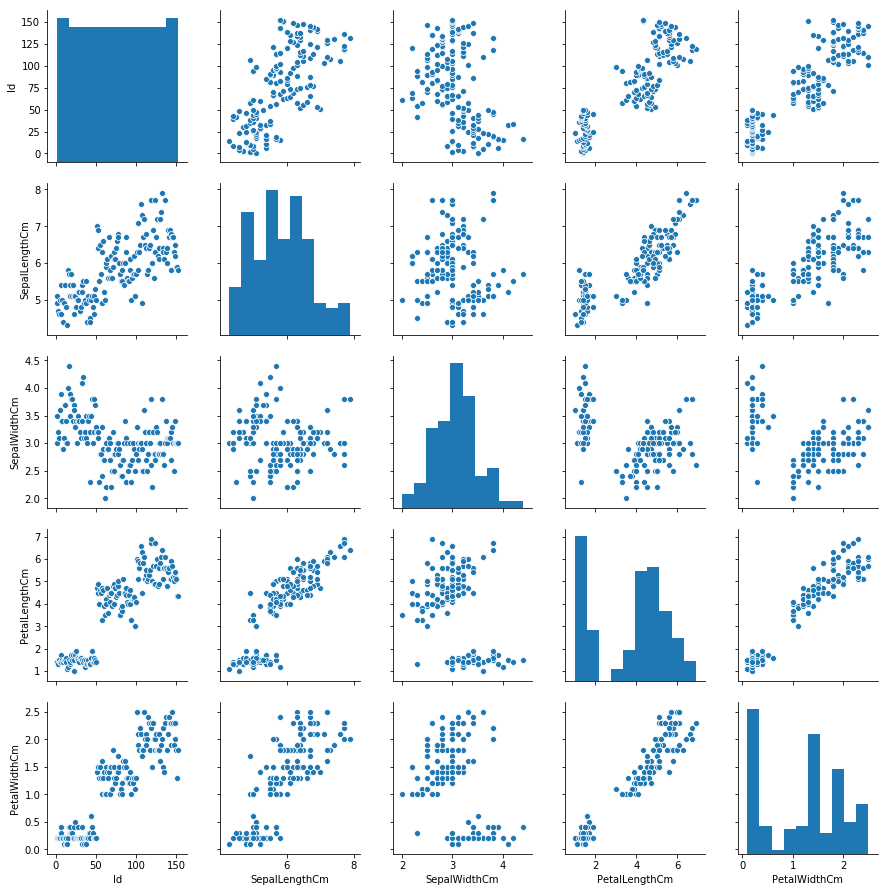

In [16]:
sns.pairplot(Iris_features_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [17]:
Iris_labels= Iris_df['Species']

In [18]:
Iris_labels.shape

(152,)

In [76]:
X=Iris_features_df

In [77]:
X.shape

(152, 5)

In [78]:
y= (Iris_labels)

In [80]:
X=X.drop(labels= 'PetalLengthCm', axis=1)

In [81]:
X=X.drop(labels= 'Id', axis=1)

In [82]:
X=X.drop(labels= 'SepalWidthCm', axis=1)

In [83]:
X.shape

(152, 2)

In [84]:
y.shape

(152,)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [90]:
K1=1
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K1,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)


Accuracy is :0.935


In [91]:
K3=3
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K3,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)


Accuracy is :0.935


In [92]:
K5=5
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K5,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)


Accuracy is :0.968


In [93]:
K9=9
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K9,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)


Accuracy is :0.968


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [111]:
K1= 1
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K1,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE1=1-scorecard
print("Misclassification error is:%.3f"%MSE1)

Accuracy is :0.935
Misclassification error is:0.065


In [112]:
K3= 3
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K3,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE3=1-scorecard
print("Misclassification error is:%.3f"%MSE3)

Accuracy is :0.935
Misclassification error is:0.065


In [113]:
K5= 5
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K5,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE5=1-scorecard
print("Misclassification error is:%.3f"%MSE5)

Accuracy is :0.968
Misclassification error is:0.032


In [114]:
K7= 7
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K7,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE7=1-scorecard
print("Misclassification error is:%.3f"%MSE7)

Accuracy is :0.968
Misclassification error is:0.032


In [115]:
K9= 9
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K9,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE9=1-scorecard
print("Misclassification error is:%.3f"%MSE9)

Accuracy is :0.968
Misclassification error is:0.032


In [120]:
K11= 11
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K11,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE11=1-scorecard
print("Misclassification error is:%.3f"%MSE11)

Accuracy is :0.968
Misclassification error is:0.032


In [121]:
K13= 13
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K13,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE13=1-scorecard
print("Misclassification error is:%.3f"%MSE13)

Accuracy is :0.968
Misclassification error is:0.032


In [122]:
K15= 15
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K15,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE15=1-scorecard
print("Misclassification error is:%.3f"%MSE15)

Accuracy is :0.968
Misclassification error is:0.032


In [125]:
K17= 17
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K17,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE17=1-scorecard
print("Misclassification error is:%.3f"%MSE17)

Accuracy is :0.968
Misclassification error is:0.032


In [126]:
K19= 19
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=K19,weights='distance')
NNH.fit(X_train,y_train)
y_pred=NNH.predict(X_test)
from sklearn.metrics import accuracy_score
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
MSE19=1-scorecard
print("Misclassification error is:%.3f"%MSE19)

Accuracy is :0.968
Misclassification error is:0.032


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[0.06451612903225812, 0.06451612903225812, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004]


Text(0.5, 1.0, 'Plot for Misclassification-error vs k ')

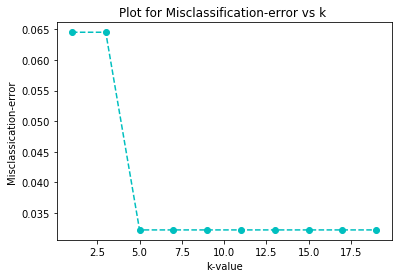

In [128]:
x=[K1,K3,K5,K7,K9,K11,K13,K15,K17,K19]
print(x)
y=[MSE1,MSE3,MSE5,MSE7,MSE9,MSE11,MSE13,MSE15,MSE17,MSE19]
print(y)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,color='c',marker='o',linestyle='dashed')
plt.xlabel('k-value')
plt.ylabel('Misclassication-error')
plt.title("Plot for Misclassification-error vs k ")